<h1>HOKI Crash Course Tutorial by Ryota Inagaki for Moving Universe Lab (Part 2) </h1>
<b>Important: For the best experience, please run the cells in order!!</b>
<p>In this tutorial, we will:
    <ol>
    <li>learn how to approximate and graph the rate of increase of remnant mass in a cluster vs log(age of the cluster) </li>
        <li>Extract a portion of a cluster's spectral energy distribution and normalize it </li>
        <li>graph the rate of occurrance of certain transient events vs log(age of the cluster) </li>
        </ol>
</p>

In [1]:
#Check if hoki can be imported properly
from hoki import load
from hoki.load import set_models_path, unpickle
import hoki
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

<p>Now, we will focus on calculating the rate of production of compact remnant mass over time. This will be done by the crude approximmation using difference in amount of remnant mass over difference in time in years.</p>
<p>First, we will find the difference between the amount of remnant mass from adjacent age bins </p>

In [2]:
#Load the table of transient events in the cluster for each time bin
TransEvents=load.model_output('/g/lu/scratch/ryotainagaki/BPASS/BPASSv2.2.1_sin-imf135_300/supernova-sin-imf135_300.z020.dat')
#Load the table of stellar remnant in the cluster for each time bin
RemnantMass=load.model_output('/u/ryotainagaki/Desktop/ryotainagaki/BPASS/BPASSv2.2.1_sin-imf135_300/starmass-sin-imf135_300.z020.dat')

In [3]:
print(type(RemnantMass))
type(TransEvents)

<class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

<p>Through load.model_output, data from output files are converted into a DataFrame object </p>

In [4]:
#Check the names of the columns of the DataFrame
print(RemnantMass.columns)
TransEvents.columns

Index(['log_age', 'stellar_mass', 'remnant_mass'], dtype='object')


Index(['log_age', 'Ia', 'IIP', 'II', 'Ib', 'Ic', 'LGRB', 'PISNe', 'low_mass',
       'e_Ia', 'e_IIP', 'e_II', 'e_Ib', 'e_Ic', 'e_LGRB', 'e_PISNe',
       'e_low_mass', 'age_yrs'],
      dtype='object')

In [5]:
hoki.BPASS_TIME_INTERVALS #The xth element equals 10^(6.05+0.1*x)-10^(5.95+0.1*x) years. x can be any whole number from
#0 to 50.

array([2.30767516e+05, 2.90519090e+05, 3.65741865e+05, 4.60441729e+05,
       5.79661793e+05, 7.29750961e+05, 9.18702029e+05, 1.15657733e+06,
       1.45604459e+06, 1.83305154e+06, 2.30767516e+06, 2.90519090e+06,
       3.65741865e+06, 4.60441729e+06, 5.79661793e+06, 7.29750961e+06,
       9.18702029e+06, 1.15657733e+07, 1.45604459e+07, 1.83305154e+07,
       2.30767516e+07, 2.90519090e+07, 3.65741865e+07, 4.60441729e+07,
       5.79661793e+07, 7.29750961e+07, 9.18702029e+07, 1.15657733e+08,
       1.45604459e+08, 1.83305154e+08, 2.30767516e+08, 2.90519090e+08,
       3.65741865e+08, 4.60441729e+08, 5.79661793e+08, 7.29750961e+08,
       9.18702029e+08, 1.15657733e+09, 1.45604459e+09, 1.83305154e+09,
       2.30767516e+09, 2.90519090e+09, 3.65741865e+09, 4.60441729e+09,
       5.79661793e+09, 7.29750961e+09, 9.18702029e+09, 1.15657733e+10,
       1.45604459e+10, 1.83305154e+10, 2.30767516e+10])

In [6]:
rm=np.array(RemnantMass['remnant_mass']) #Convert the column of remnant masses into an Numpy array to process
#remnant mass

<p> Unlike the HOKI Documentation I will be using all of the rows in the DataFrame extracted from the first supernova .dat file.</p>

<p> What is the remnant mass (in solar masses) that's in our cluster in the nth time bin? Let's find out through the print statement </p>

In [7]:
print(RemnantMass['remnant_mass'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.0000
5       1329.1557
6       3536.3196
7       4941.0116
8       6963.9335
9       9570.5809
10     10739.0860
11     12118.2650
12     13465.8660
13     14347.9160
14     16594.4250
15     18276.7160
16     20211.7770
17     21787.4650
18     21787.4650
19     21787.4650
20     21787.4650
21     21787.4650
22     21787.4650
23     21787.4650
24     21787.4650
25     21787.4650
26     21787.4650
27     21787.4650
28     21787.4650
29     21787.4650
30     21787.4650
31     22473.5810
32     23695.5460
33     23695.5460
34     23695.5460
35     23695.5460
36     23695.5460
37     23695.5460
38     23695.5460
39     23695.5460
40     23695.5460
41     23695.5460
42     23695.5460
43     29262.6520
44     34866.8240
45     40393.6380
46     40393.6380
47     43362.3580
48     52869.7590
49    109247.4900
50    185347.4900
Name: remnant_mass, dtype: float64


In [8]:
rm=np.diff(rm) #Find the difference between adjacent age bin's remnant masses. Result is a 50 element 1D array
print(rm)

[    0.         0.         0.         0.      1329.1557  2207.1639
  1404.692   2022.9219  2606.6474  1168.5051  1379.179   1347.601
   882.05    2246.509   1682.291   1935.061   1575.688      0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
   686.116   1221.965      0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
  5567.106   5604.172   5526.814      0.      2968.72    9507.401
 56377.731  76100.    ]


<p>Let's approximate the rate of change of remnant mass per year (mass') as mass'(10^x years)=(mass(10^(x+0.1))-mass(10^x))/(10^(x+0.1)-10^x) </p>
<p> Now let's find the "time gap" in years between x-th and x+1 st time bins: 10**(6.1+x*0.1)-10**(6.0+x*0.1). This is a part of a <b>crude</b> approximation. </p>

[2.58925412e+05 3.25967781e+05 4.10369123e+05 5.16624117e+05
 6.50391229e+05 8.18794045e+05 1.03080063e+06 1.29770111e+06
 1.63370890e+06 2.05671765e+06 2.58925412e+06 3.25967781e+06
 4.10369123e+06 5.16624117e+06 6.50391229e+06 8.18794045e+06
 1.03080063e+07 1.29770111e+07 1.63370890e+07 2.05671765e+07
 2.58925412e+07 3.25967781e+07 4.10369123e+07 5.16624117e+07
 6.50391229e+07 8.18794045e+07 1.03080063e+08 1.29770111e+08
 1.63370890e+08 2.05671765e+08 2.58925412e+08 3.25967781e+08
 4.10369123e+08 5.16624117e+08 6.50391229e+08 8.18794045e+08
 1.03080063e+09 1.29770111e+09 1.63370890e+09 2.05671765e+09
 2.58925412e+09 3.25967781e+09 4.10369123e+09 5.16624117e+09
 6.50391229e+09 8.18794045e+09 1.03080063e+10 1.29770111e+10
 1.63370890e+10 2.05671765e+10]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.04362489e-03 2.69562769e-03 1.36271938e-03 1.55885041e-03
 1.59553969e-03 5.68140745e-04 5.32654941e-04 4.13415399e-04
 2.14940636e-04 4.34844005e-04 2.58658316e-04 2.36330

Text(0.5, 1.0, 'Rate of change of total remnant mass over log(age in years)')

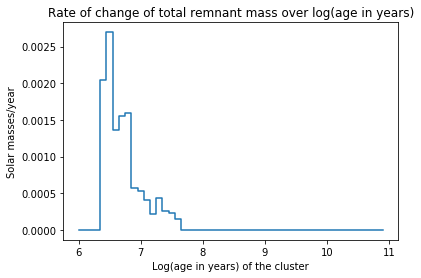

In [9]:
TimeGaps2=[] #These contains 10**(x+1)-10**x for x=6.0, 6.1, .. 10.9.
for x in range(50):
    TimeGaps2.append(10**(6.1+x*0.1)-10**(6.0+x*0.1))
#Very important note! In the manual, it is said that the first time bin is of size 10**6.05 years. However, I will asssume
#that the rate of star-death has been 0 during the first 10**6.05 years of stellar population evolution.
TimeGaps2=np.array(TimeGaps2)
print(TimeGaps2)
#rm now becomes an array containing approximate rate of increase of remnant mass for log(age in years)=6.0, 6.1, to 10.9.
rm=rm/TimeGaps2
print(rm)

plt.step(hoki.BPASS_TIME_BINS[:-1], rm, where='mid')
plt.xlabel('Log(age in years) of the cluster')
plt.ylabel('Solar masses/year')
plt.title('Rate of change of total remnant mass over log(age in years)')

Text(0.5, 1.0, 'Rate of change of total remnant mass over log(age in years)')

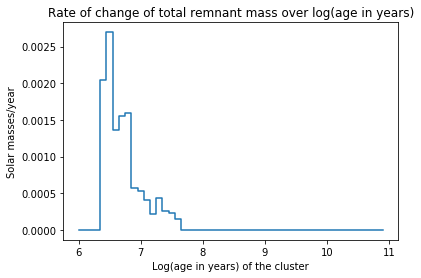

In [10]:
plt.step(hoki.BPASS_TIME_BINS[:-1], rm, where='mid')
plt.xlabel('Log(age in years) of the cluster')
plt.ylabel('Solar masses/year')
plt.title('Rate of change of total remnant mass over log(age in years)')

<h3>Spectra</h3>
<p> Spectra files give associated flux quantities (in solar luminosities/angstrom) as function of age of the stellar cluster in log(years) and of the wavelength of light in Angstroms.A wavelength in the BPASS output can be an integer between 1 and 100000 angstroms. Loading the spectra files will yield a column of wavelengths along with columns for each age containing flux values of light of each wavelength </p>
<p>Here we examine a binary-system cluster with a maximum stellar mass of 100 with Salpeter IMF and solar metallicity </p>

In [11]:
#Spectra: really a table of flux values as a function of age in log years and of wavelength in Angstroms.
spectra=load.model_output('/g/lu/scratch/ryotainagaki/BPASS/BPASSv2.2.1_bin-imf135all_100/spectra-bin-imf135all_100.z020.dat')
print(type(spectra))
print(spectra.columns)
#Note how the columns represent the different age bins whose spectra (specifically distribution of flux) you can chose 

<class 'pandas.core.frame.DataFrame'>
Index(['WL', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8',
       '6.9', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8',
       '7.9', '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '9.0', '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', '9.8',
       '9.9', '10.0', '10.1', '10.2', '10.3', '10.4', '10.5', '10.6', '10.7',
       '10.8', '10.9', '11.0'],
      dtype='object')


<p>Now select the age whose flux over wavelength graph/series you want to view. </p>
<p>Wavelengths are in angstroms. The table covers for 1 to 100000 angstroms</p>
<p>We will work with the lower end of the visible spectrum. (400 nm to 550 nm) 
Then, we will choose to work with the spectral energy distribution of the cluster at ages 10**6.6 years and 
10**10.5 years.</p>

In [12]:
specOfInterest0=spectra[(spectra.WL>4000) & (spectra.WL<5500)] #V[(condition) & (condition)] is how we put constraints
#The columns are by age bin. We need to understand that the age inputs are descretized and are strings
#For my example, I will be examining the visible spectrum of light.
#This one is of the cluster at 10**6.6 years of age.
specOfInterest1=specOfInterest0['6.6']

In [13]:
#Spectral energy distribution of the cluster at 10**10.5 years of age.
specOfInterest2=specOfInterest0['10.5']

In [14]:
specOfInterest2 #See the flux values of the cluster's light in the visible spectrum)

4000    3.591458
4001    4.276794
4002    3.178865
4003    2.936799
4004    2.611210
          ...   
5494    4.298727
5495    5.335416
5496    5.737990
5497    5.922107
5498    3.578448
Name: 10.5, Length: 1499, dtype: float64

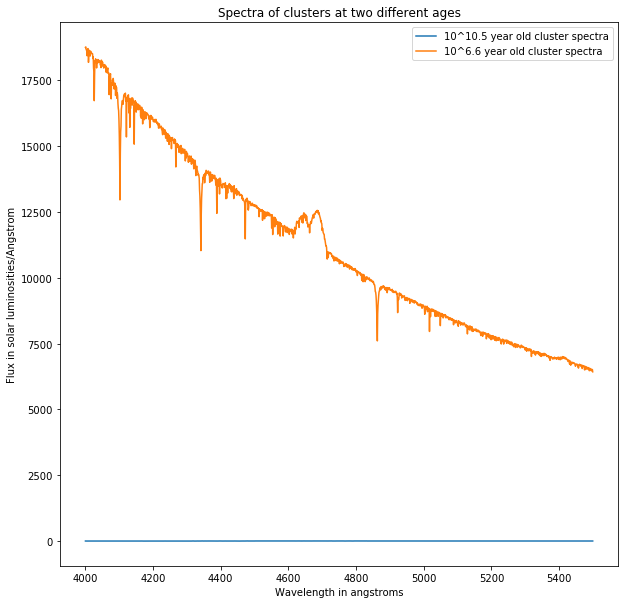

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(specOfInterest0.WL, specOfInterest2, label='10^10.5 year old cluster spectra')
plt.plot(specOfInterest0.WL, specOfInterest1, label='10^6.6 year old cluster spectra')
plt.xlabel('Wavelength in angstroms')
plt.ylabel('Flux in solar luminosities/Angstrom')
plt.title('Spectra of clusters at two different ages')
plt.legend()

<p> For those who want to see what the dataframe for spectra looks like, we see that columns are the fluxes by log(age) </p>

In [16]:
print(specOfInterest0)

          WL        6.0        6.1        6.2        6.3        6.4  \
4000  4001.0  11460.150  13477.940  14990.920  17842.080  22371.330   
4001  4002.0  11456.990  13472.960  14984.760  17834.780  22364.670   
4002  4003.0  11426.020  13441.450  14952.220  17801.360  22336.120   
4003  4004.0  11420.370  13433.820  14943.320  17790.300  22321.410   
4004  4005.0  11416.140  13427.180  14935.340  17778.170  22301.900   
...      ...        ...        ...        ...        ...        ...   
5494  5495.0   3655.451   4305.111   4807.681   5764.252   7311.357   
5495  5496.0   3659.500   4308.587   4810.766   5766.363   7308.846   
5496  5497.0   3652.926   4301.540   4803.278   5756.536   7275.263   
5497  5498.0   3654.650   4302.835   4804.318   5758.927   7304.662   
5498  5499.0   3644.520   4292.512   4793.847   5748.049   7292.161   

            6.5        6.6        6.7        6.8  ...       10.1      10.2  \
4000  23159.930  18749.420  13556.930  10469.260  ...  10.036970  7.4

<p>One tool that I have learned from tutorial is to normalize
spectra dataframe using the command function MinMaxScalar.fit_transform(dataframe.values) to make each spectra curve reach 1.0 when it reaches the maximum flux and 0 when it reaches its minimum flux. I apply this normalization to the spectra of the cluster at log(age in years)=10.5 and at log(age in years)=6.6</p>

In [17]:
from sklearn.preprocessing import MinMaxScaler
specOfInterest0=pd.DataFrame(MinMaxScaler().fit_transform(specOfInterest0.values), columns=specOfInterest0.columns)

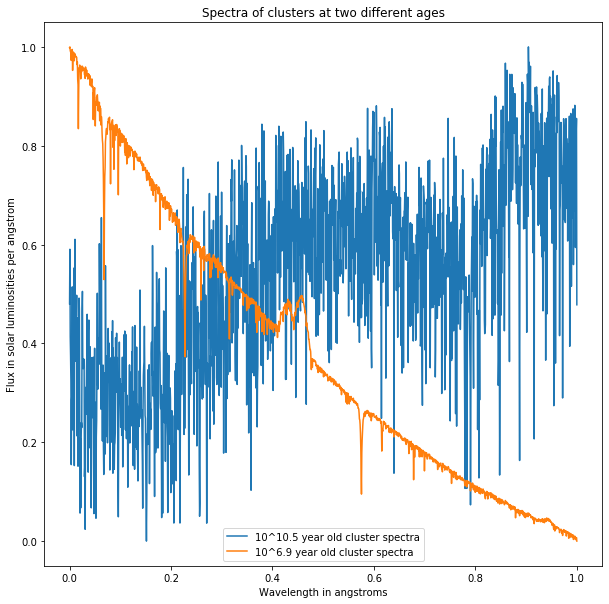

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(specOfInterest0.WL, specOfInterest0['10.5'], label='10^10.5 year old cluster spectra')
plt.plot(specOfInterest0.WL, specOfInterest0['6.6'], label='10^6.9 year old cluster spectra')
plt.xlabel('Wavelength in angstroms')
plt.ylabel('Flux in solar luminosities per angstrom')
plt.title('Spectra of clusters at two different ages')
plt.legend()

<p> Normalizing makes our spectra graphs easier to read and allows us to see more clearly where the minima and maxima are.</p>
<h3>What to do with spectra</h3>
<p>Accessing the spectra data can allow you to identify the ages of clusters/constituent parts of the cluster. Given a normalized cluster spectra, one can try to normalize the spectra for a given IMF, maximum stellar mass, age which can be juxtapozed to find the spectra that fits the best. Also, multiple spectra can be superposed to create a compound spectra. These can represent stellar populations made up of parts that are of different ages.

Also, spectra can also tell information about the composition of the stellar cluster.Spectral features such as peaks and troughs examined by Lick Indeces can give insight into what elements (including metals like iron and nickel) are abundant.</p>

<h2>Examining Transient Event Rates </h2>
<p>Recall that we have created the TransEvents Pandas DataFrame from the .dat file containing the number of transient events that
occur in each age bin </p>
<p> Here, we examine how to extract and graph the data regarding the rates of occurence of certain transient events. </p>

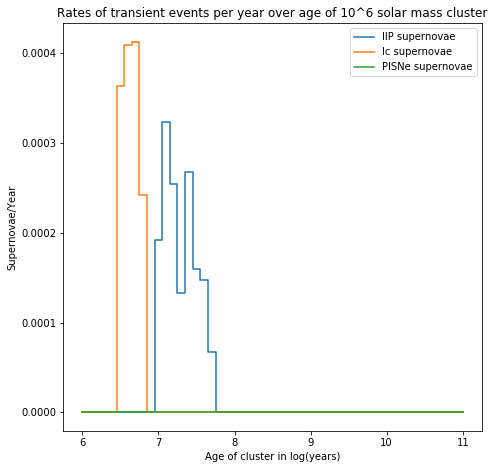

In [19]:
#Note that the entries in the Transevents table stands for the number of events by type of event in the given row's age and the next row's age
IIPRates=TransEvents['IIP']/TransEvents.age_yrs #Age_years stands for the years between the last age bin and the row's age bin
IcRates=TransEvents['Ic']/TransEvents.age_yrs
PISNRates=TransEvents['PISNe']/TransEvents.age_yrs
plt.figure(figsize=(7.5, 7.5))
plt.step(TransEvents.log_age, IIPRates, where='mid', label='IIP supernovae')
plt.step(TransEvents.log_age, IcRates, where='mid', label='Ic supernovae')
plt.step(TransEvents.log_age, PISNRates, where='mid', label='PISNe supernovae')
plt.xlabel('Age of cluster in log(years)')
plt.ylabel('Supernovae/Year')
plt.title('Rates of transient events per year over age of 10^6 solar mass cluster')
plt.legend()

<h3>Sources</h3>
    <li>HOKI by Heloise Stevance (Stevance et. al 2020) and its dependencies</li>
    <li>SPISEA by Matthew Hosek (Hosek et. al 2020) and its dependencies</li>
Please see the ReadMe for a more comprehensive collection of citations.